In [2]:
import pandas as pd
import numpy as np
rd = pd.read_csv('/Users/sriharigururaj/Documents/SEM3/Big Data/Research paper/ccrimes.csv')
rd.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [3]:
import matplotlib.pyplot as plot
import seaborn as sea
plot.figure(figsize=(10,7))
sea.heatmap(rd.isnull(), cbar = False, cmap = 'viridis')

In [4]:
rd = rd.dropna()
rd = rd.drop(['Unnamed: 0', 'ID', 'Case Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)
pd.value_counts(rd['Primary Type'])[:10]

THEFT                  321950
BATTERY                258941
CRIMINAL DAMAGE        152812
NARCOTICS              131177
ASSAULT                 89508
OTHER OFFENSE           85361
BURGLARY                81668
DECEPTIVE PRACTICE      67609
MOTOR VEHICLE THEFT     59856
ROBBERY                 56092
Name: Primary Type, dtype: int64

In [5]:
pd.value_counts(rd['Location Description'])[:10]

STREET                            325084
RESIDENCE                         223854
APARTMENT                         179444
SIDEWALK                          158478
OTHER                              53474
PARKING LOT/GARAGE(NON.RESID.)     40907
ALLEY                              31239
RESIDENTIAL YARD (FRONT/BACK)      30209
SMALL RETAIL STORE                 28209
SCHOOL, PUBLIC, BUILDING           25474
Name: Location Description, dtype: int64

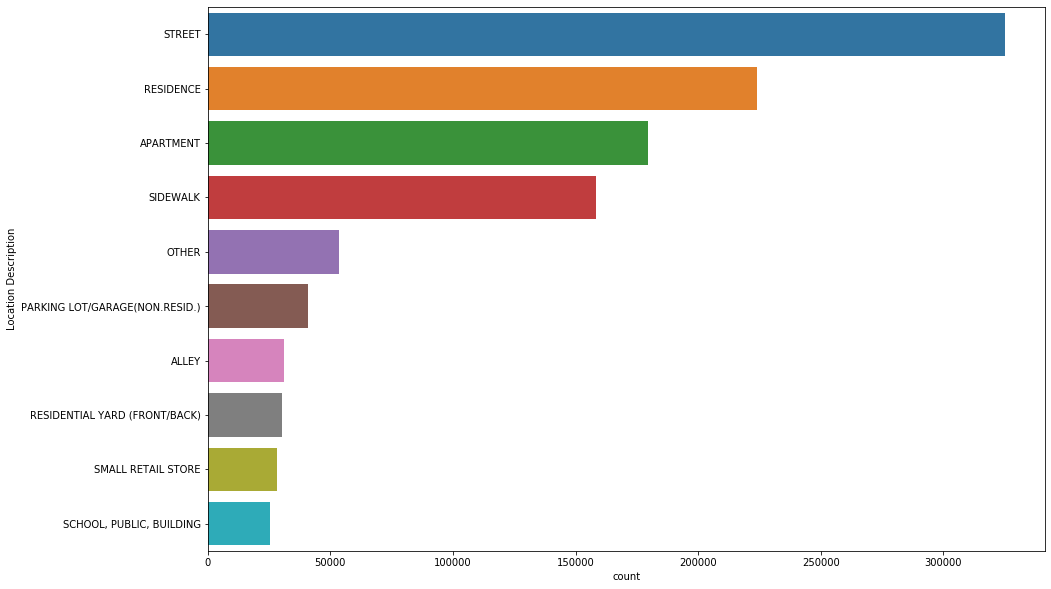

In [6]:
plot.figure(figsize = (15, 10))
sea.countplot(y= 'Location Description', data = rd, order = rd['Location Description'].value_counts().iloc[0:10].index)

In [7]:
import folium
import matplotlib.pyplot as plt
import seaborn as sea
c_m = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

In [8]:
locs = rd.groupby('Community Area').first()

In [9]:
new_locs = locs.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [10]:
new_locs.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
0.0,41.799090,-87.790549,RESIDENCE-GARAGE,False
1.0,41.998131,-87.665814,SIDEWALK,False
2.0,41.999731,-87.705810,STREET,False
3.0,41.972843,-87.671127,HOSPITAL BUILDING/GROUNDS,False
4.0,41.981316,-87.695119,RESIDENTIAL YARD (FRONT/BACK),False


In [11]:
for i in range(len(new_locs)):
    lat = new_locs.iloc[i][0]
    long = new_locs.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locs.index[i],
                               new_locs.iloc[i][-1],
                               new_locs.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(c_m)

In [12]:
c_m 

In [13]:
uniq_locs = rd['Location'].value_counts()

In [14]:
uniq_locs.index

Index(['(41.883500187, -87.627876698)', '(41.754592961, -87.741528537)',
       '(41.979006297, -87.906463155)', '(41.897895128, -87.624096605)',
       '(41.742710224, -87.634088181)', '(41.909664252, -87.742728815)',
       '(41.896888586, -87.628203192)', '(41.885487535, -87.726422045)',
       '(41.868541914, -87.639235361)', '(41.976290414, -87.905227221)',
       ...
       '(41.745784509, -87.605904736)', '(41.934566918, -87.751628365)',
       '(42.011731539, -87.674491974)', '(42.00679144, -87.659737172)',
       '(41.748892534, -87.589419276)', '(41.957790762, -87.763571896)',
       '(41.766011654, -87.654142503)', '(41.76837389, -87.591052758)',
       '(41.794799853, -87.67738218)', '(41.737449034, -87.546206914)'],
      dtype='object', length=368079)

In [15]:
crime_count = pd.DataFrame({"Raw_String" : uniq_locs.index, "ValueCount":uniq_locs})
crime_count.index = range(len(uniq_locs))
crime_count.head()

,Raw_String,ValueCount
0,"(41.883500187, -87.627876698)",2093
1,"(41.754592961, -87.741528537)",2082
2,"(41.979006297, -87.906463155)",1338
3,"(41.897895128, -87.624096605)",1319
4,"(41.742710224, -87.634088181)",1122


In [16]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [17]:
crime_count['LocationCoord'] = crime_count['Raw_String'].apply(Location_extractor)
crime_count  = crime_count.drop('Raw_String', axis = 1)

In [18]:
crime_map = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

for index in range(500):
    latitude = crime_count['LocationCoord'].iloc[index][0]
    longitude = crime_count['LocationCoord'].iloc[index][1]
    radius = crime_count['ValueCount'].iloc[index] / 45
    
    if crime_count['ValueCount'].iloc[index] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               crime_count['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [latitude, longitude], popup= popup_text,radius = radius, color = color, fill = True).add_to(crime_map)

In [19]:
crime_map

In [20]:
rdt = rd[rd['Primary Type'] == 'THEFT']

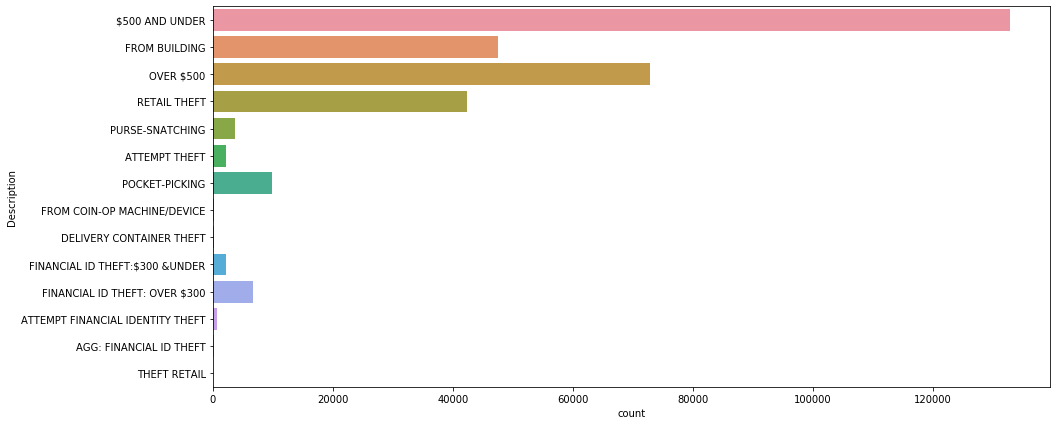

In [21]:
plot.figure(figsize = (15, 7))
sea.countplot(y = rdt['Description'])

In [22]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,132848,$500 AND UNDER
1,72957,OVER $500
2,47527,FROM BUILDING
3,42450,RETAIL THEFT
4,9910,POCKET-PICKING


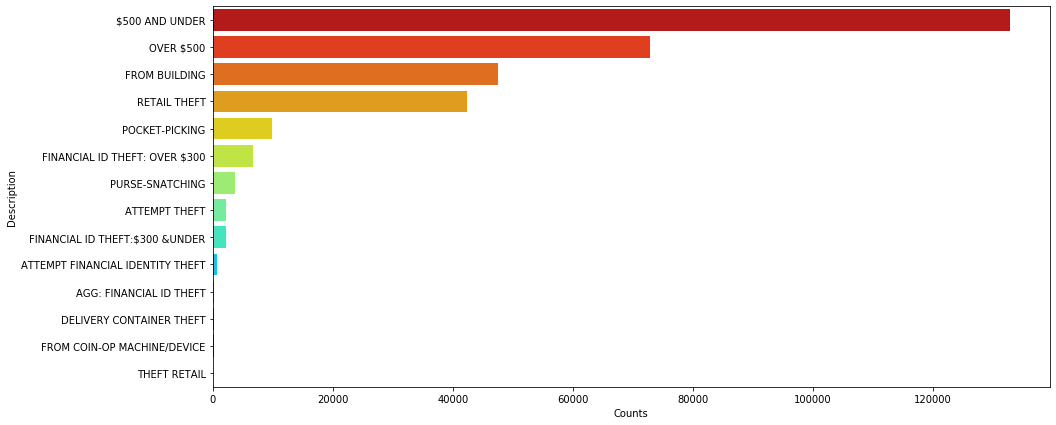

In [23]:
plt.figure(figsize = (15, 7))
sea.barplot(y ="Description", x = "Counts", data = rdt_data, palette="jet_r")

In [29]:
%%time
rdt['Date'] = pd.to_datetime(rdt['Date'])
rdt['Month'] = rdt['Date'].apply(lambda x : x.month)
theft_in_months = pd.DataFrame({"thefts" : rdt['Month'].value_counts(), "month" : rdt["Month"].value_counts().index}, index = range(12))
theft_in_months.fillna(0, inplace=True)
theft_in_months = theft_in_months.sort_values(['month'], ascending=[1])
theft_in_months.head()

/Users/sriharigururaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CPU times: user 1.24 s, sys: 35.2 ms, total: 1.27 s
Wall time: 1.12 s


/Users/sriharigururaj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,thefts,month
9,29039.0,1
11,25791.0,2
10,28556.0,3
8,31238.0,4
5,27630.0,5
